In [45]:
import json

def load_jsonl(f):
    return list(map(lambda x: json.loads(x), open(f).readlines()))

fsrs_6 = load_jsonl("../srs-benchmark/result/FSRS-6.jsonl")
button_usage = load_jsonl("button_usage.jsonl")

users = list(zip(fsrs_6, button_usage))
users = sorted(users, key=lambda u: u[1]["size"])
users[0]

({'metrics': {'RMSE': 0.393138,
   'LogLoss': 0.516497,
   'RMSE(bins)': 0.170836,
   'ICI': 0.087297,
   'AUC': 0.568092},
  'user': 4746,
  'size': 2545,
  'parameters': {'0': [3.5517,
    3.4822,
    3.3673,
    38.0526,
    7.1144,
    0.4855,
    1.9533,
    0.1639,
    1.544,
    0.4117,
    1.0511,
    2.0135,
    0.0402,
    0.5138,
    2.4411,
    0.2941,
    2.8301,
    0.4928,
    0.4605,
    0.3433,
    0.1001]}},
 {'user': 4745,
  'size': 441,
  'first_rating_prob': [0.1122, 0.2143, 0.6735, 0.0],
  'review_rating_prob': [0.1007, 0.7914, 0.1079],
  'learn_costs': [16.31, 180.0, 120.0, 0.0],
  'review_costs': [120.0, 60.0, 60.0, 60.0],
  'first_rating_offset': [-0.09, -0.29, -0.08, 0.0],
  'first_session_len': [0.81, 2.0, 1.08, 0.0],
  'forget_rating_offset': -0.18,
  'forget_session_len': 1.18,
  'short_term_recall': [0.6, 1.0, 0.9841, 0.9836],
  'learning_step_transition': [[2, 1, 2, 1], [0, 5, 29, 1], [1, 12, 58, 10]],
  'relearning_step_transition': [[1, 9, 51, 1], [0, 1

In [46]:
x = [user[1]["size"] for user in users]
y = [user[0]["metrics"]["RMSE(bins)"] for user in users]

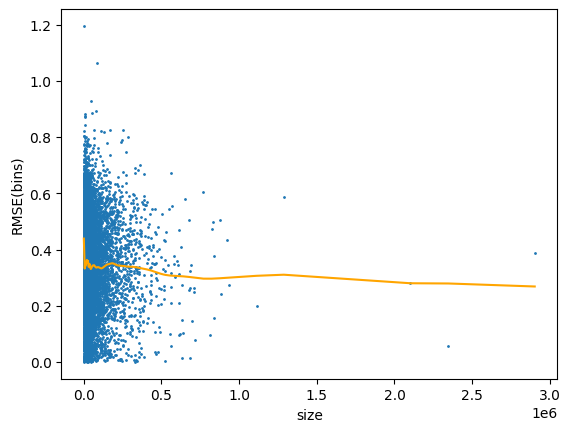

In [9]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt
import numpy as np

def plot(x, y):
    ax = plt.axes()

    vals = lowess(y, x, it=3, frac=0.1)
    ax.scatter(x, y, s=1)
    ax.plot([x[0] for x in vals], [x[1] for x in vals], color="orange")

    ax.set_xlabel("size")
    ax.set_ylabel("RMSE(bins)")

    ax.plot()

plot(x, y)


[ 5.46103542e-21 -5.12171920e-15 -4.89265257e-08  3.48148721e-01]


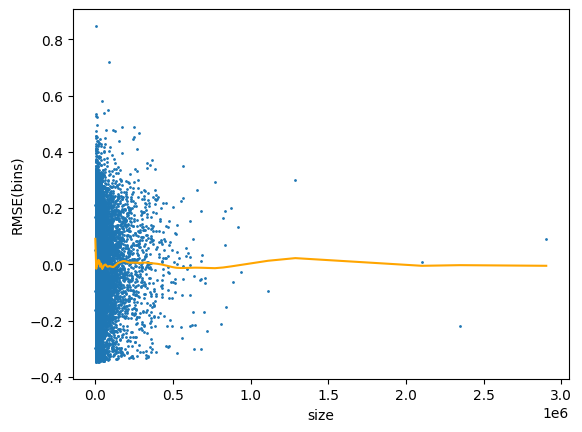

In [ ]:
coefficients = np.polyfit(x, y, 3)
print(coefficients)

def retention_factor(r, x):
    return x - np.polyval(coefficients, r)

adjusted_loss = retention_factor(x, y)

plot(x, y)

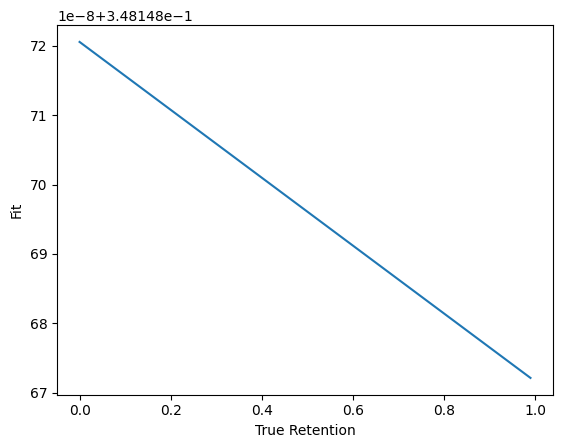

In [12]:
ax = plt.axes()

ax.set_xlabel("True Retention")
ax.set_ylabel("Fit")

ax.plot(np.arange(100) / 100, -retention_factor(np.arange(100) / 100, 0))

(array([212., 202., 199., 196., 205., 254., 292., 336., 338., 403., 468.,
        458., 534., 500., 556., 534., 520., 523., 506., 485., 424., 370.,
        355., 300., 266., 210., 133.,  78.,  46.,  26.,  16.,  18.,  12.,
          8.,   7.,   1.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.34644438, -0.32256976, -0.29869515, -0.27482053, -0.25094592,
        -0.2270713 , -0.20319669, -0.17932207, -0.15544746, -0.13157284,
        -0.10769823, -0.08382362, -0.059949  , -0.03607439, -0.01219977,
         0.01167484,  0.03554946,  0.05942407,  0.08329869,  0.1071733 ,
         0.13104792,  0.15492253,  0.17879715,  0.20267176,  0.22654637,
         0.25042099,  0.2742956 ,  0.29817022,  0.32204483,  0.34591945,
         0.36979406,  0.39366868,  0.41754329,  0.44141791,  0.46529252,
         0.48916714,  0.51304175,  0.53691637,  0.56079098,  0.58466559,
         0.60854021,  0.63241482,  0.65628944,  0.68016405,  0.70403867,
 

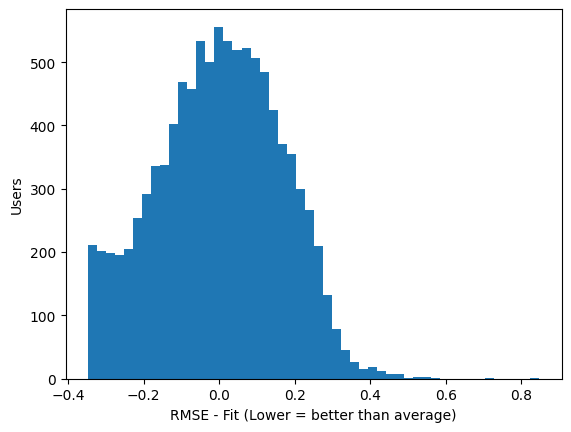

In [13]:
ax = plt.axes()

ax.set_xlabel("RMSE - Fit (Lower = better than average)")
ax.set_ylabel("Users")

ax.hist(adjusted_loss, bins=50)